In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm
import scipy
import matplotlib.ticker as ticker
from scipy import linalg
from sklearn import preprocessing

In [3]:
def CanvasStyle(ax, x_min=0, y_min=0):
    ax.patch.set_facecolor('white')
    plt.grid('off')
    plt.tight_layout()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.axhline(linewidth=3, y=y_min, color='k')
    ax.axvline(linewidth=3, x=x_min, color='k')
    ax.yaxis.set_tick_params(width=2)
    ax.xaxis.set_tick_params(width=2)
    return ax

In [4]:
plt.rcParams['font.weight'] = 'normal'#'bold'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.style.use('seaborn-ticks')
errbarattr = {'lw':3,
              'capthick':3,
              'capsize':10,
              'ecolor':'black'
             }

In [8]:
IO = r'/work/r04b43015/ImgData/pBAD_HalfLife.xlsx'
sheet = pd.read_excel(io=IO)
df = pd.DataFrame(sheet)
df = df.fillna(0)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
avg = df.mean(axis=1)
std = df.std(axis=1)

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

norm = np.max(avg.iloc[:])
# Draw the plot.
ax.plot(5*avg.iloc[:].index, avg.iloc[:]/norm, 'tomato', label='Half life', linewidth=3)
# Draw the error bar with a filled region.
ax.fill_between(5*avg.iloc[:].index,
                (avg.iloc[:]-std.iloc[:])/norm,
                (avg.iloc[:]+std.iloc[:])/norm,
                alpha=0.2,
                facecolor='tomato',
                edgecolor='tomato',
                linewidth=0.0)
CanvasStyle(ax, x_min=0, y_min=-0.2)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Normalized Fluorescence Intensity')
ax.set_xlim([0, max(5*avg.iloc[:].index)])
ax.legend()
prefix = r'/work/r04b43015/ImgData'
plt.savefig('{0}/PopZHalfLife_line.ps'.format(prefix), format='ps')
plt.savefig('{0}/PopZHalfLife_line.pdf'.format(prefix), format='pdf')
plt.show()

In [10]:
print(df)

          0         1         2         3         4         5         6   \
0   0.947800  0.731473  0.913773  0.873223  1.000000  0.998603  1.000000   
1   0.855995  1.000000  1.000000  1.000000  0.825425  0.784881  0.901230   
2   0.478612  0.599831  0.772733  0.633852  0.340343  0.829041  0.839455   
3   0.612212  0.673963  0.907995  0.481534  0.341418  0.664080  0.649106   
4   1.000000  0.207352  0.179124  0.264339  0.222337  0.404309  0.259510   
5   0.880967  0.291087  0.162353  0.209959  0.238547  0.377546  0.278101   
6   0.458471  0.139361  0.051936  0.122344  0.171439  0.247103  0.145113   
7   0.494234  0.158041  0.080328  0.161549  0.136352  0.240857  0.186600   
8   0.691296  0.972865  0.563135  0.279672  0.307924  0.302260  0.319520   
9   0.667484  0.841629  0.807338  0.190344  0.325583  0.245287  0.168012   
10  0.439300  0.694557  0.344523  0.132787  0.107000  0.187816  0.098660   
11  0.443601  0.707519  0.322310  0.134331  0.087515  0.182779  0.117113   
12  0.830518

RangeIndex(start=0, stop=210, step=5)
[-0.02825031  0.33869401]
[[-0.33869401]
 [-0.02825031]]


/work/r04b43015/anaconda3/lib/python3.5/site-packages/matplotlib/cbook.py:2644: UserWarning: Saw kwargs ['mew', 'markeredgewidth'] which are all aliases for 'markeredgewidth'.  Kept value from 'markeredgewidth'
  seen=seen, canon=canonical, used=seen[-1]))


save


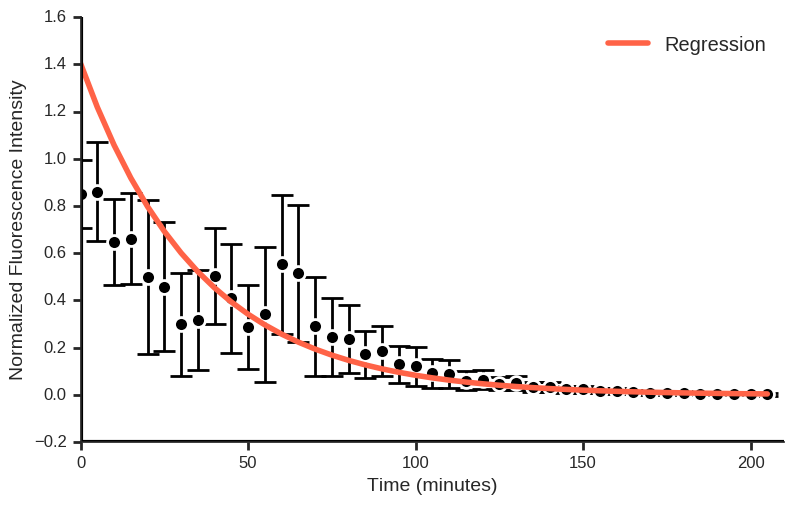

In [8]:
IO = r'/work/r04b43015/ImgData/pBAD_HalfLife.xlsx'
sheet = pd.read_excel(io=IO)
df = pd.DataFrame(sheet)
del df[14]
df = df.fillna(0)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

avg = df.mean(axis=1)
std = df.std(axis=1)
print(5*avg.iloc[:45].index)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
# Draw the plot.
# ax.scatter(avg.iloc[:45].index, avg.iloc[:45],
#             facecolor='k', edgecolor='k', s=35)
#ax.plot(avg.iloc[:45], 'tomato', label='Half life', linestyle='', linewidth=3)
# Fitting the curve by least-square method.
c = np.polyfit(5*avg.iloc[:45].index, np.log(avg.iloc[:45]), 1)
print(c)
func = lambda t: np.exp(t*c[0]+c[1])


b = np.ones((len(avg.iloc[:45].index), 1))
b[:, 0] = np.log(avg.iloc[:45])
A = np.ones((len(avg.iloc[:45].index), 2))
A[:, 0] = -1
A[:, 1] = 5*avg.iloc[:45].index
Transition = np.dot(np.transpose(A), A)
ATb = np.dot(np.transpose(A), b)
c_new = np.dot(linalg.inv(Transition), ATb)
print(c_new)


ax.errorbar(5*avg.iloc[:45].index, avg.iloc[:45], yerr=std,
            marker='o', ecolor='k', 
            mfc='k', ms=10, mec='w', mew=2,  
            ls='', elinewidth=2, capthick=2, capsize=8)

p_res = np.poly1d(np.polyfit(5*avg.iloc[:45].index, avg.iloc[:45], 3))
# ax.plot(5*avg.iloc[:45].index, p_res(5*avg.iloc[:45].index),
#         linewidth=3, color='steelblue', label='Least-square order=3')
ax.plot(5*avg.iloc[:45].index, func(5*avg.iloc[:45].index),
        linewidth=4, color='tomato', label='Regression')


y_min, _ = ax.get_ylim()
x_min, _ = ax.get_xlim()
ax = CanvasStyle(ax, x_min=x_min, y_min=y_min)
ax.set_xlabel('Time (minutes)')
ax.set_ylabel('Normalized Fluorescence Intensity')
ax.set_xlim([0, 210])
ax.legend()
prefix = r'/work/r04b43015/ImgData'
plt.savefig('{0}/FocusHalfLife.ps'.format(prefix), format='ps')
plt.savefig('{0}/FocusHalfLife.pdf'.format(prefix), format='pdf')
print('save')
plt.show()

1.40311394068


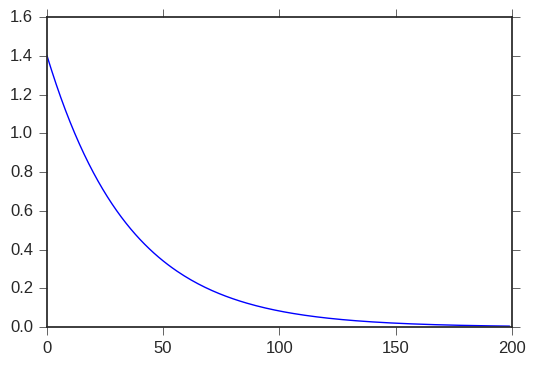

In [6]:
exp_func = lambda t: np.exp(-0.02825031*t+0.33869401)
print(np.exp(0.33869401))
plt.plot(np.arange(200), exp_func(np.arange(200)))
plt.show()

In [3]:
col = ['profiles', 'PS', 'PUL', 'Pearson']
groups = ['116', '117', '100']
supgroups = ['CH1', 'CH2']
ID_num = [5, 6, 3]

arrays = [[groups[0] for _ in range(ID_num[0]+1)]+[groups[0] for _ in range(ID_num[0]+1)],
          [supgroups[0] for _ in range(ID_num[0]+1)]+[supgroups[1] for _ in range(ID_num[0]+1)],
          [i for i in np.arange(ID_num[0])]+['mean']+[i for i in np.arange(ID_num[0])]+['mean']]
index = pd.MultiIndex.from_product(arrays, names=['Names', 'Ch', 'ID'])
df1 = pd.DataFrame(columns=col, index=arrays)


arrays = [[groups[1] for _ in range(ID_num[1]+1)]+[groups[1] for _ in range(ID_num[1]+1)],
          [supgroups[0] for _ in range(ID_num[1]+1)]+[supgroups[1] for _ in range(ID_num[1]+1)],
          [i for i in np.arange(ID_num[1])]+['mean']+[i for i in np.arange(ID_num[1])]+['mean']]
index = pd.MultiIndex.from_product(arrays, names=['Names', 'Ch', 'ID'])
df2 = pd.DataFrame(columns=col, index=arrays)

arrays = [[groups[2] for _ in range(ID_num[2]+1)]+[groups[2] for _ in range(ID_num[2]+1)],
          [supgroups[0] for _ in range(ID_num[2]+1)]+[supgroups[1] for _ in range(ID_num[2]+1)],
          [i for i in np.arange(ID_num[2])]+['mean']+[i for i in np.arange(ID_num[2])]+['mean']]
index = pd.MultiIndex.from_product(arrays, names=['Names', 'Ch', 'ID'])
df3 = pd.DataFrame(columns=col, index=arrays)

# print(index)
df1
fdf = pd.concat([df1, df2, df3])

In [4]:
np.unique([ele[0] for ele in fdf.index.values])

array(['100', '116', '117'], 
      dtype='<U3')

In [1]:
fdf.loc['117'].loc['CH1'].loc[0, 'profiles']
df3.set_value(('100', 'CH1', 0), 'PS', np.array([1,2,3]))
df3.set_value(('100', 'CH1', 1), 'PS', np.array([1,8,4]))
df3.set_value(('100', 'CH1', 2), 'PS', np.array([7,2,0]))
print(df3.loc['100'].loc['CH1'].loc[:,'PS'][:-1].get_values().std())
df1.set_value(('116', 'CH1', 'mean'), 'PS', np.array([7,2,0]))
df2.set_value(('117', 'CH1', 'mean'), 'PS', np.array([8,2,5]))
df3.set_value(('100', 'CH1', 'mean'), 'PS', df3.loc['100'].loc['CH1'].loc[:, 'PS'][:-1].get_values().std())
print(df3.iloc[:])
fdf = pd.concat([df1, df2, df3])
print(df3.loc['100'].loc['CH1'].loc[:,'PS'][:-1].get_values())
arrs = [arr for arr in df3.loc['100'].loc['CH1'].loc[:,'PS'][:-1].get_values()]
maxs = max([arr.max() for arr in df3.loc['100'].loc['CH1'].loc[:,'PS'][:-1].get_values()])

plt.show()

NameError: name 'fdf' is not defined

In [32]:
fdf.loc['{}'.format(groups)].loc['CH1'].loc['mean', 'PS']

KeyError: "the label [['116', '117', '100']] is not in the [index]"

In [45]:
x = np.array([])
arr1 = np.array([1,2,3,6])
arr2 = np.array([2,2,8,6])
arr3 = np.array([7,4,3,9])
x = np.concatenate((x, arr1), axis=None)
x = np.concatenate((x, arr2), axis=0)
x = np.concatenate((x, arr3), axis=0)
print(x)

IndexError: axis 1 out of bounds [0, 1)

In [40]:
x = np.array([(1,2),(2,3),(3,5)])
i=3
y=np.nonzero([i==ind for ind in x])
z = np.zeros((x.shape[0], x.shape[1]), dtype='O')
for a,b in zip(y[0],y[1]):
    z[a,b]=np.array([1,2,3])
print(y)
print(x.shape)
print(z)

(array([1, 2]), array([1, 0]))
(3, 2)
[[0 0]
 [0 array([1, 2, 3])]
 [array([1, 2, 3]) 0]]


In [5]:
L = [1,0]
res = []
for i in L:
    for ii in L:
        for iii in L:
            for iv in L:
                res.append([i, ii, iii, iv])
print(res)

[[1, 1, 1, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 0, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 0]]


In [7]:
def A(arr):
    a=1
    if arr[1]==1:
        if arr[2]==0:
            a=0
    else:
        if arr[2]==1:
            a=0
    return a

def B(arr):
    if arr[0]==1 or arr[2]==1:
        b=1
    else:
        b=0
    return b

def C(arr):
    if arr[1]==0 and arr[2]==1:
        c=1
    else:
        c=0
    return c

def D(arr):
    if arr[1]==1:
        d=1
    else:
        d=0
    return d

arrs = res

for arr in arrs:
    a=A(arr)
    b=B(arr)
    c=C(arr)
    d=D(arr)
    if a+b+c+d==3:
        print('Answer!!', arr, a, b, c, d)

Answer!! [1, 1, 1, 1] 1 1 0 1
Answer!! [1, 1, 1, 0] 1 1 0 1
Answer!! [0, 1, 1, 1] 1 1 0 1
Answer!! [0, 1, 1, 0] 1 1 0 1


In [8]:
arrs = [('M', 'Y'), ('F', 'E'), ('M', 'Y'), ('F', 'Y'), ('F', 'E'), ('F', 'E'), ('M', 'Y')]
M_num = 0
Y_num = 0
for arr in arrs:
    if arr[0]=='M':
        M_num+=1
    if arr[1]=='Y':
        Y_num+=1
print(M_num, Y_num)

3 4


In [17]:
input_arr = [41, 33, 17, 80, 61, 5, 55]
res_arr = []
for _ in range(len(input_arr)):
    tmp = 0
    j = None
    for i, ele in enumerate(input_arr):
        if ele > tmp:
            tmp = ele
            j = i
    res_arr.append(tmp)
    input_arr[j] = 0
print(res_arr)

[80, 61, 55, 41, 33, 17, 5]


In [29]:
L = [1,2,3]
size = 3
res = []

for _ in range(size**2):
    used = [1 for _ in range(size)]
    tmp = []
    for ind in range(size):
        if used[ind]==1:
            used[ind] = 0
            tmp.append(L[ind])
    print(tmp)

print(res)

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[]


In [1]:
import numpy as np
print(np.zeros(5))
print(np.ones(5))
print(np.nonzero(np.array([1,0,8,2,0,5])))

[ 0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.]
(array([0, 2, 3, 5]),)


In [32]:
folder = dict(x=1, y=np.array([1,2,3]), z='Test')
print(folder)

{'y': array([1, 2, 3]), 'x': 1, 'z': 'Test'}


In [2]:
arr = np.array([1,2,3])
1-arr

array([ 0, -1, -2])

In [30]:
dict_x = {'a':True, 'b':False, 'c':True}

def a():
    return 'A'

def b():
    return 'B'

def c():
    return 'C'

arr = [v[0] for v in dict_x.items() if v[1]]
method_to_call = [eval(func)() for func in arr]
print(method_to_call)

['A', 'C']


In [23]:
data = np.zeros((3, 2), dtype='O')
data[0,0]=[1,2,3]
data[1,0]=[5,5,0]
data[2,0]=[5,8,2]
data[0,1]=[0,4,3]
data[1,1]=[9,5,9]
data[2,1]=[0,8,7]
print(data.shape)
avg = [np.mean(d) for d in data[:,0]]
print(avg)

(3, 2)
[2.0, 3.3333333333333335, 5.0]


In [17]:
x = np.array([np.nan, 1, 5])
g = np.nonzero(np.isnan(x))
print(g)
x[~np.isnan(x)]

(array([0]),)


array([ 1.,  5.])

In [4]:
x = 0/(3-3)
y = 0/0

ZeroDivisionError: division by zero

In [5]:
x=[0,1,2,3,4,5,6,7]
print(len(x[2:5]))
list(range(2,5))

3


[2, 3, 4]